In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools

In [2]:
os.chdir('/Users/alisdghnia/Desktop/Research Datasets/')

In [3]:
df = pd.read_csv('names-mc-volume.csv')
df_1 = pd.read_csv('technical-terms-top-29.csv')

In [6]:
all_df = pd.merge(df, df_1, left_on = 'Name', right_on = 'Unnamed: 0')

In [7]:
all_df = all_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [21]:
all_df = all_df[np.log10(all_df.market_cap) >= 1]
all_df

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,market_cap,volume_y,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,0.000615,0.000307,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,0.000530,0.000000,0.0,0.0,0.000235,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.001095,0.000360,0.0,0.0,0.000030,0.0,0.000045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000060
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.001014,0.000000,0.0,0.0,0.000078,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.000000
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,0.000286,0.000261,0.0,0.0,0.000025,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,0.000042,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,0.000068,0.000158,0.0,0.0,0.000113,0.0,0.000045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000023
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.000804,0.000262,0.0,0.0,0.000017,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.001118,0.000219,0.0,0.0,0.000196,0.0,0.000000,...,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.000231


TypeError: expected non-empty vector for x

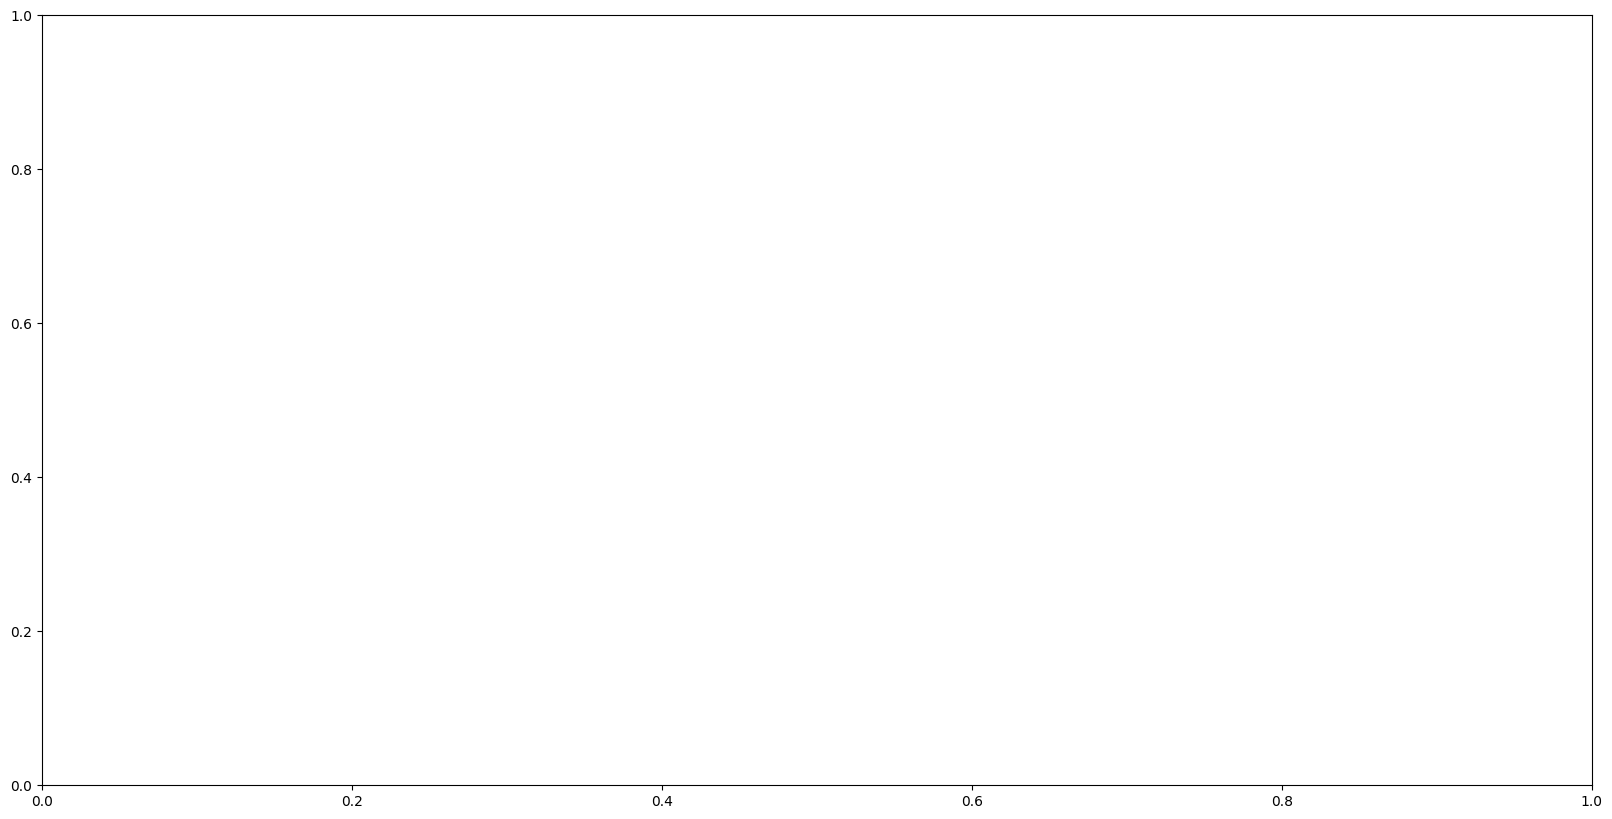

In [33]:
top_2 = all_df['proof work'].quantile(0.98)
top_df = all_df[all_df['proof work'] > top_2]
fig = plt.figure(figsize=(20,10))
fig.add_subplot(111)

x = top_df['proof work']
y=np.log10(top_df.market_cap)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y)

plt.title('proof work', fontsize = 20)
plt.xlabel('TF-IDF')
plt.ylabel('Market Cap (log10)')

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(color='black', linestyle='-', linewidth=0.08)
plt.plot(x,p(x),"r--")

# plt.xticks([0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008])
# plt.hlines(y = 5, xmin = 0, xmax = 13, colors= 'black')
# plt.vlines(x = 5, ymin = 0, ymax = 13, colors= 'black')
plt.show()

In [26]:
all_df.columns[3:]

Index(['blockchain', 'smart contract', 'proof work', 'proofofwork', 'pow',
       'proof stake', 'proofofstake', 'pos', 'multisig', 'hash rate',
       'merkle tree', 'side chain', 'multicoin wallet', 'multisig wallet',
       'delegated proof stake', 'delegated pos', 'artificial intelligence',
       'machine learning', 'zeroknowledge proof', 'zero knowledge proof',
       'multisignature architecture', 'multi signature architecture',
       'multiparty computation', 'mpc', 'multi party computation',
       'privacy preserving protocols', 'privacypreserving protocols',
       'decentralized applications', 'dapps'],
      dtype='object')

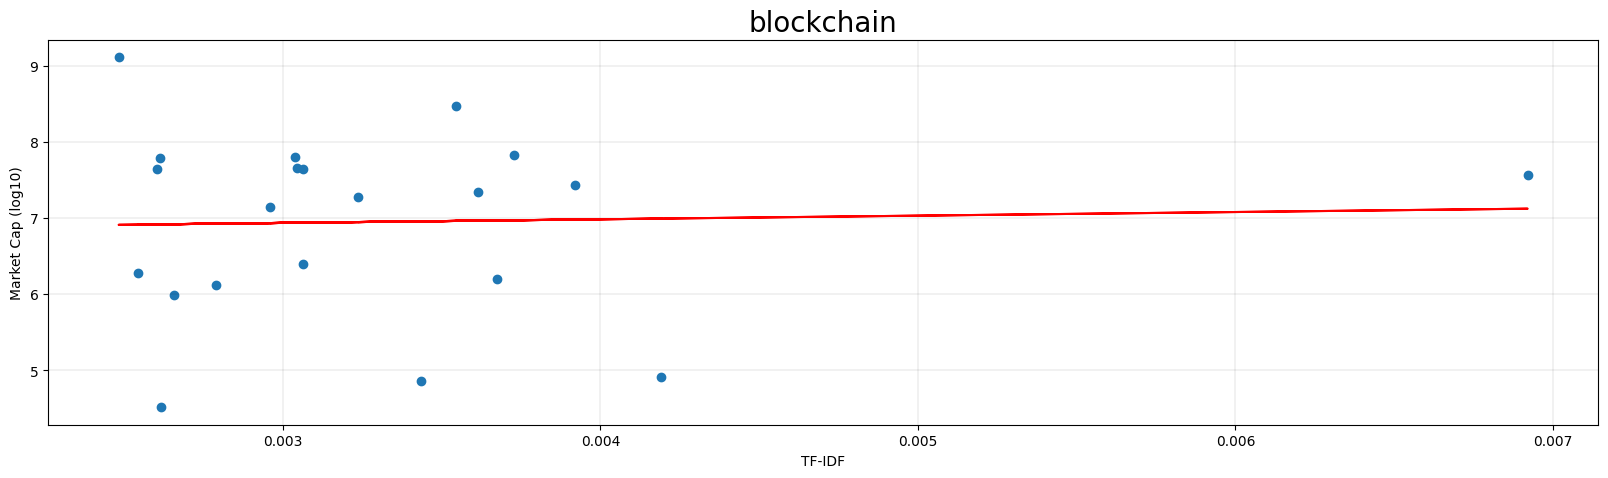

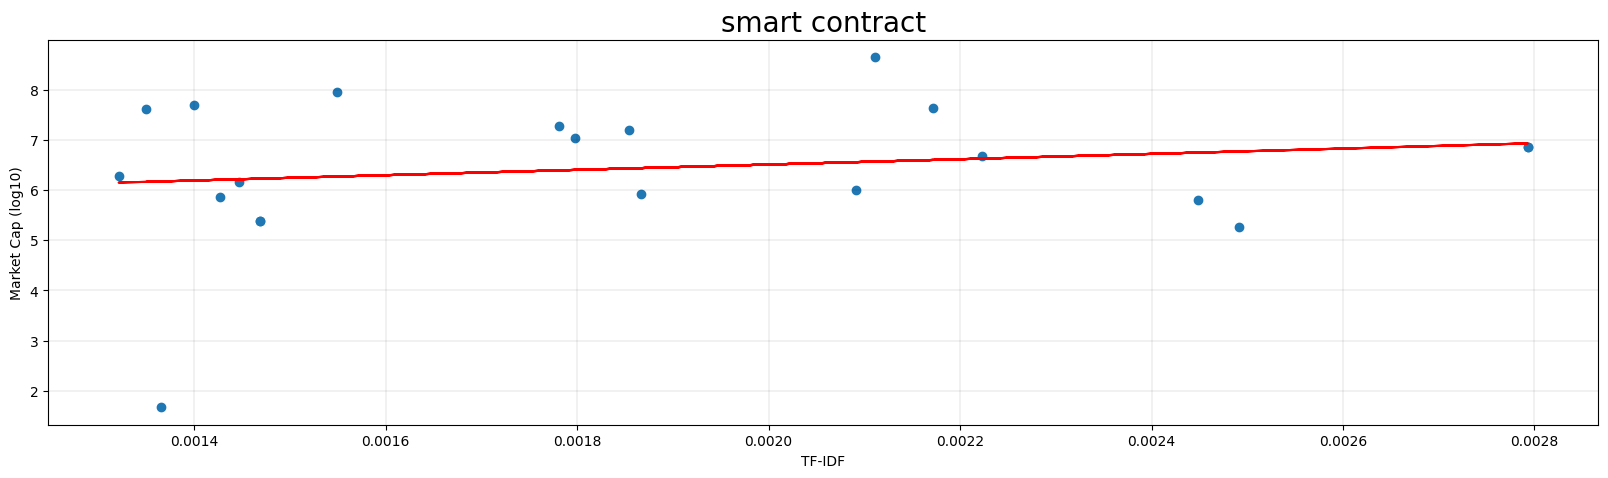

proof work is not good for visualization


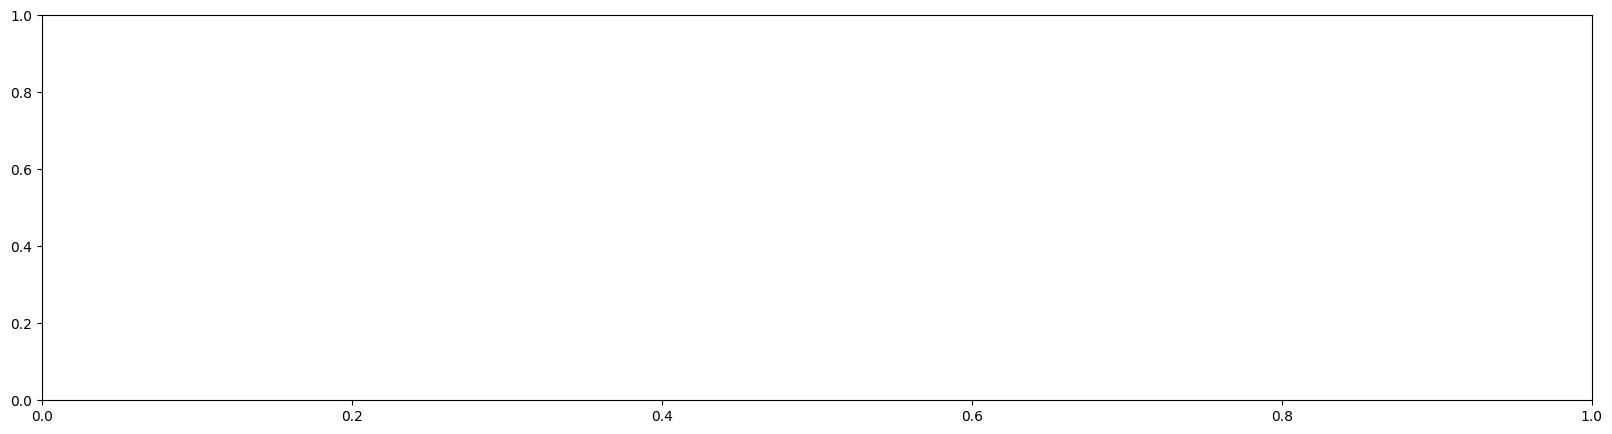

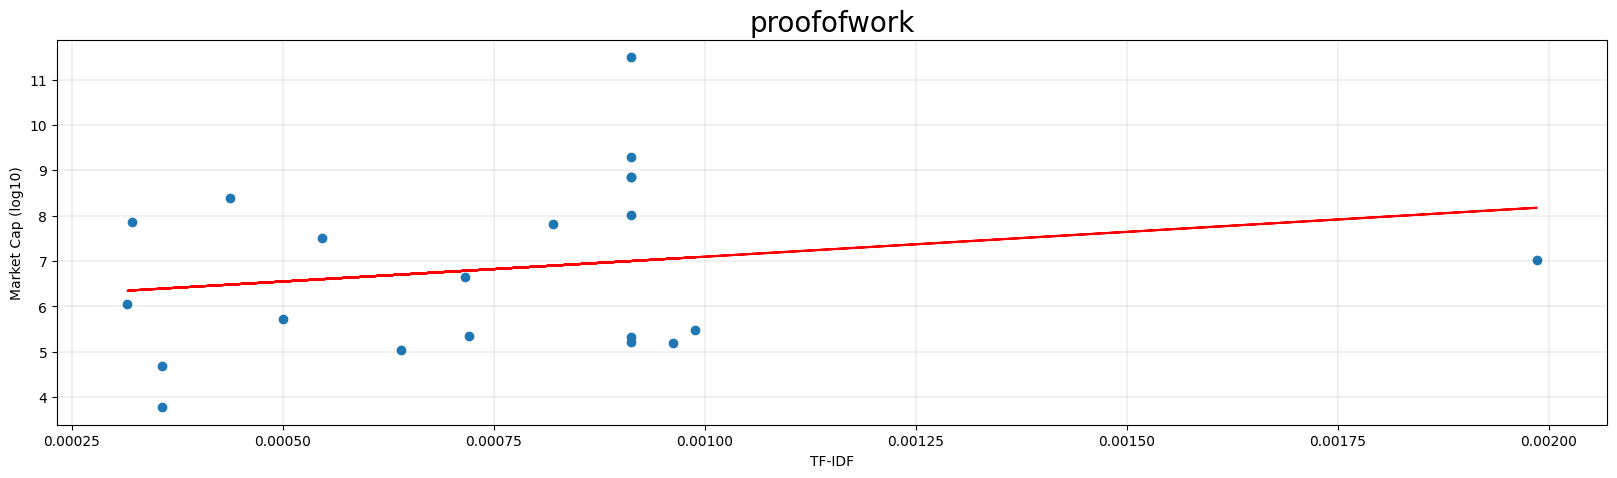

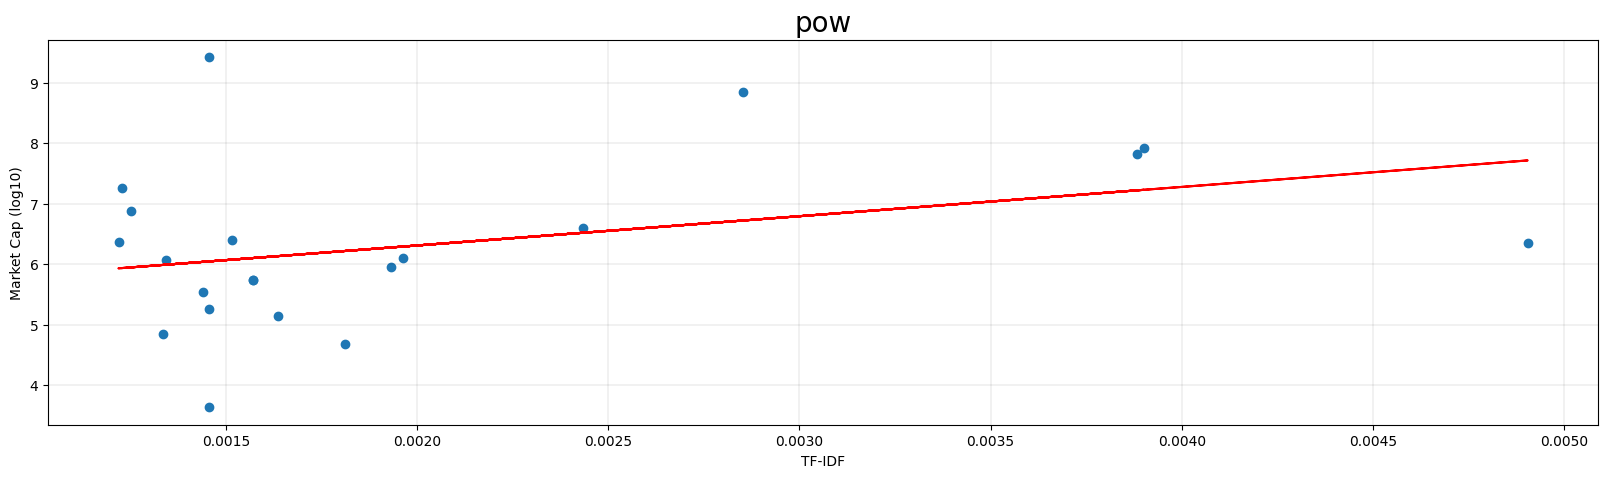

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


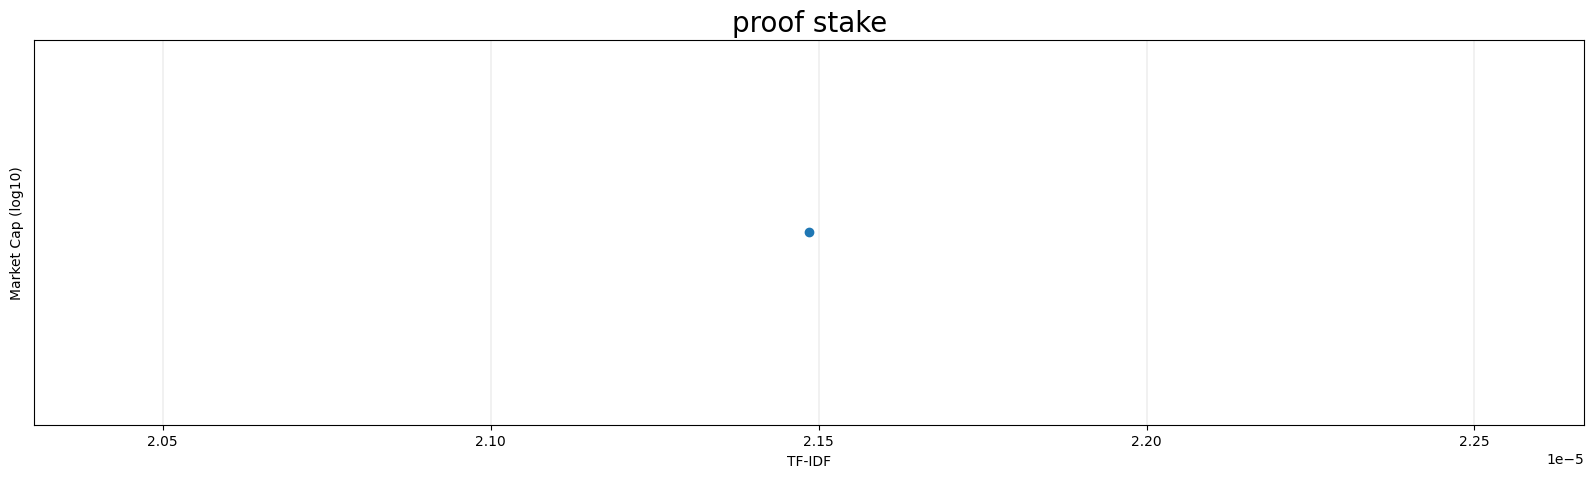

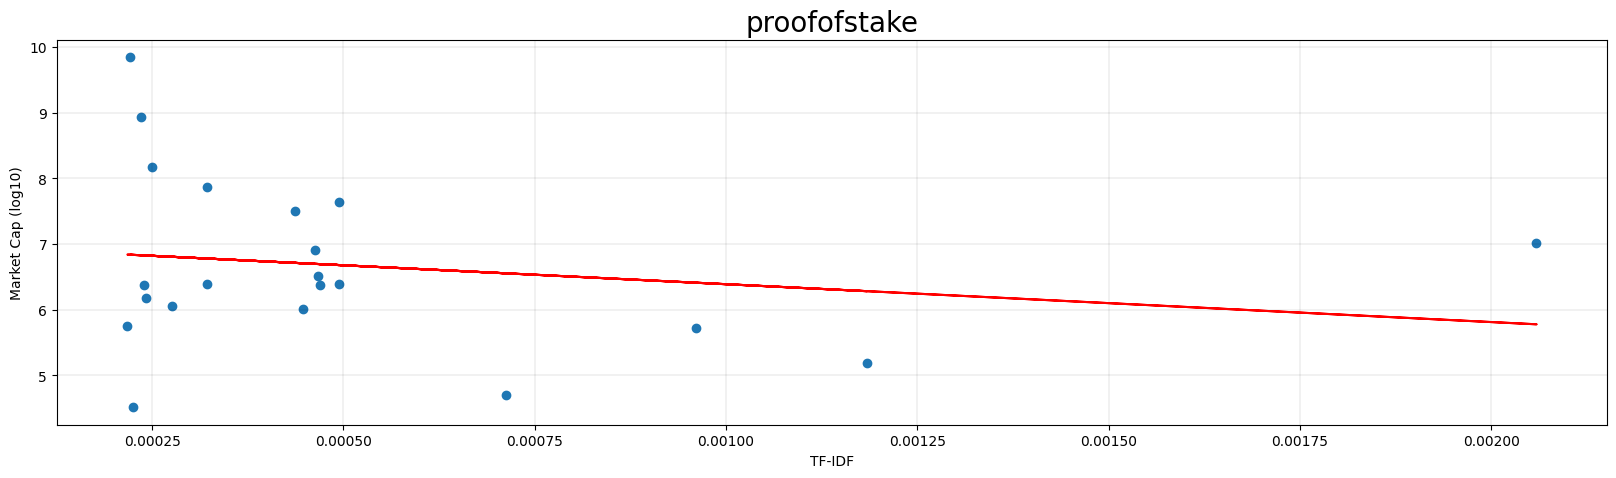

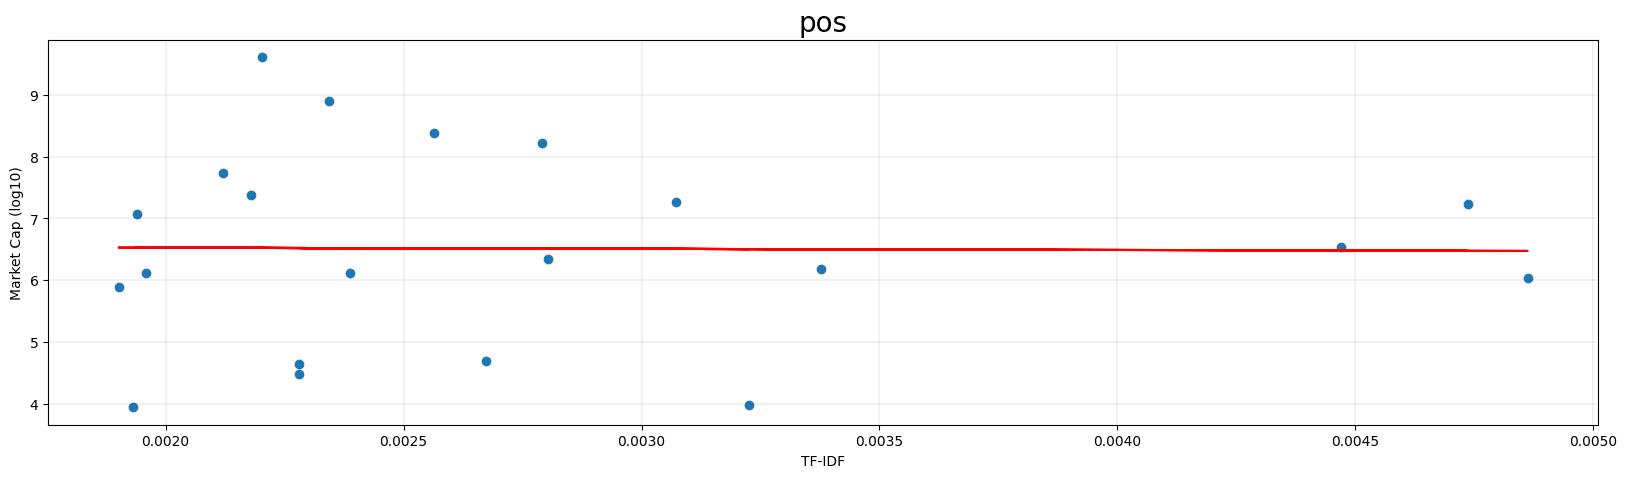

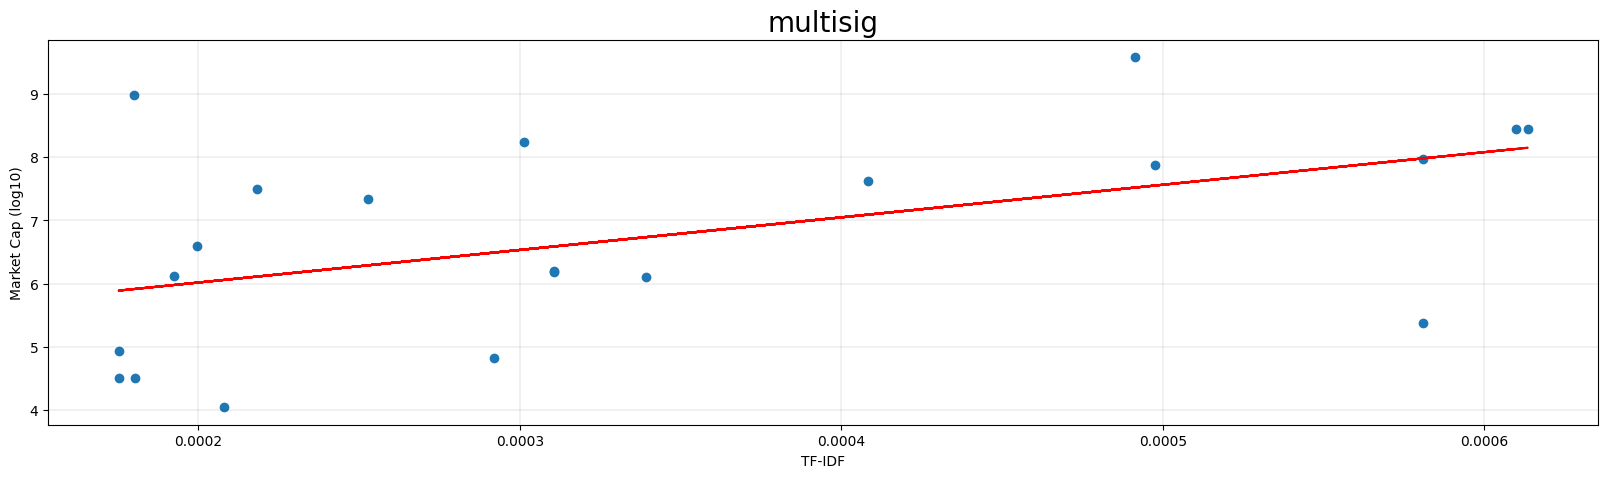

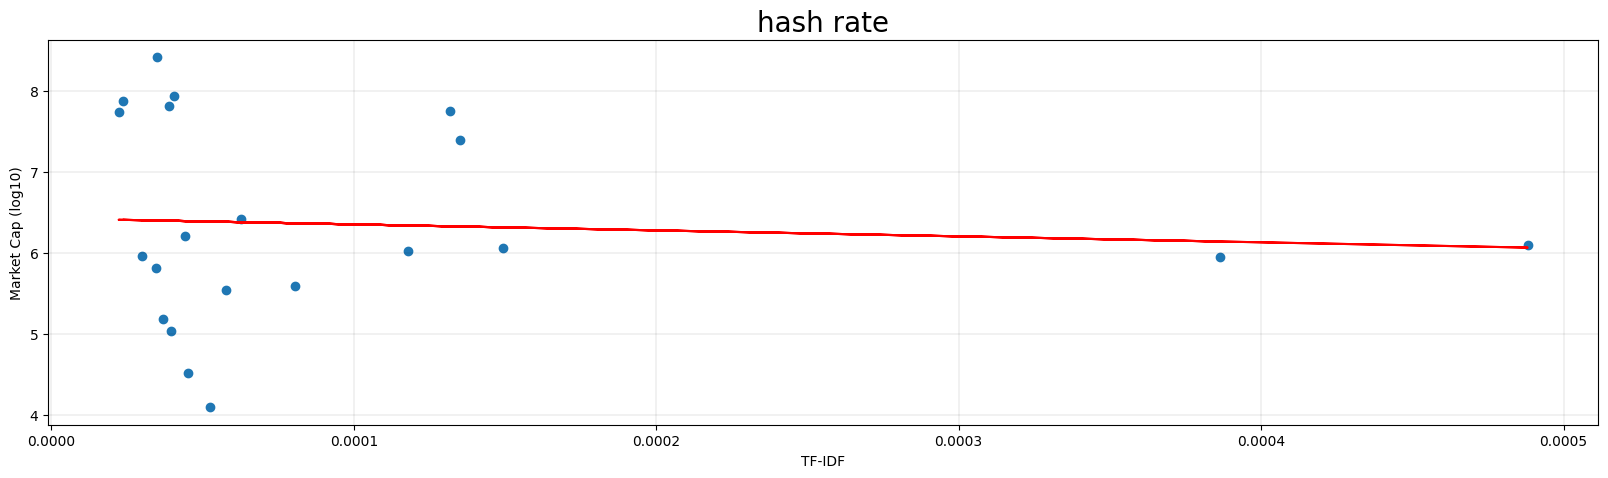

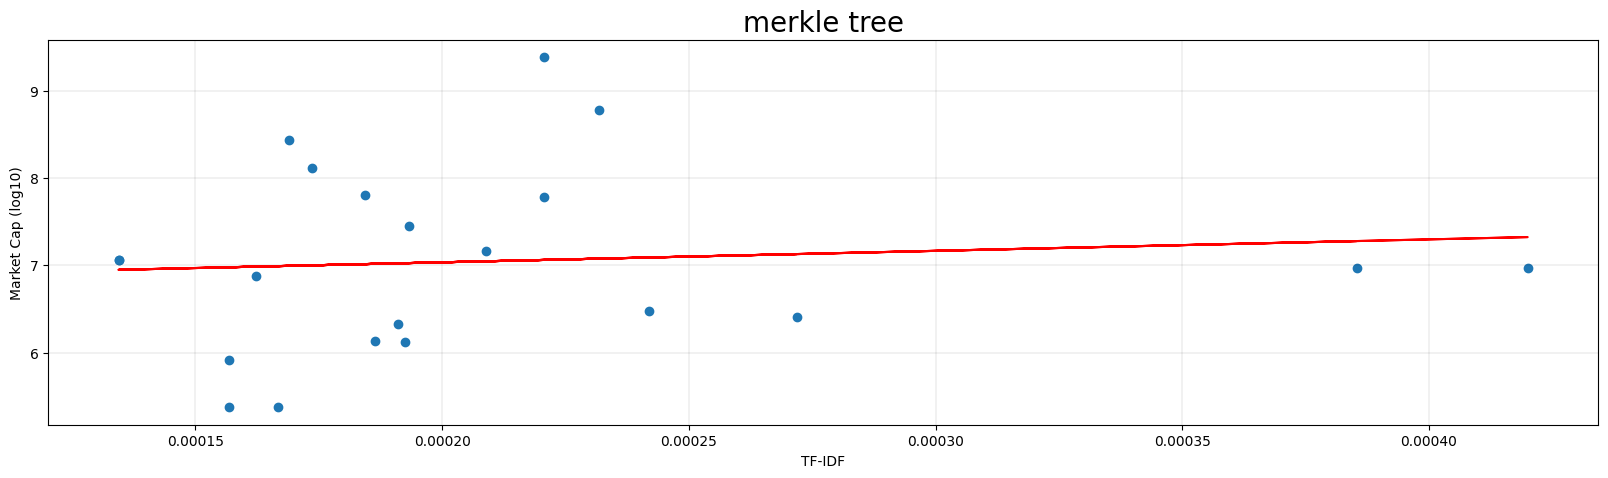

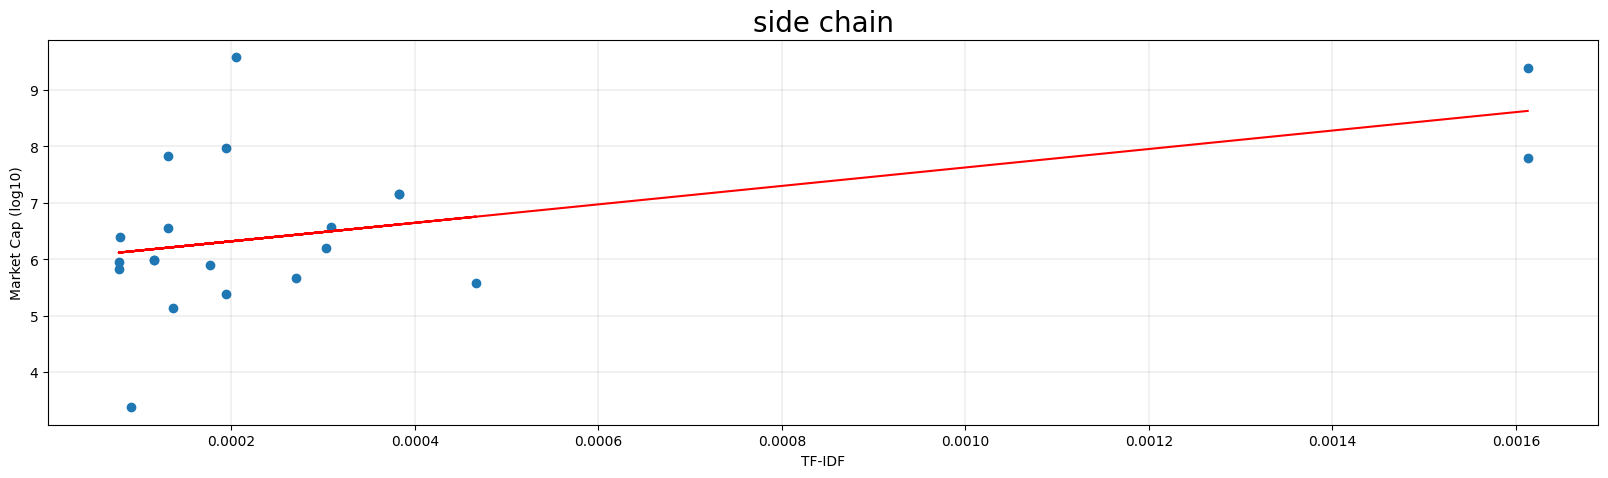

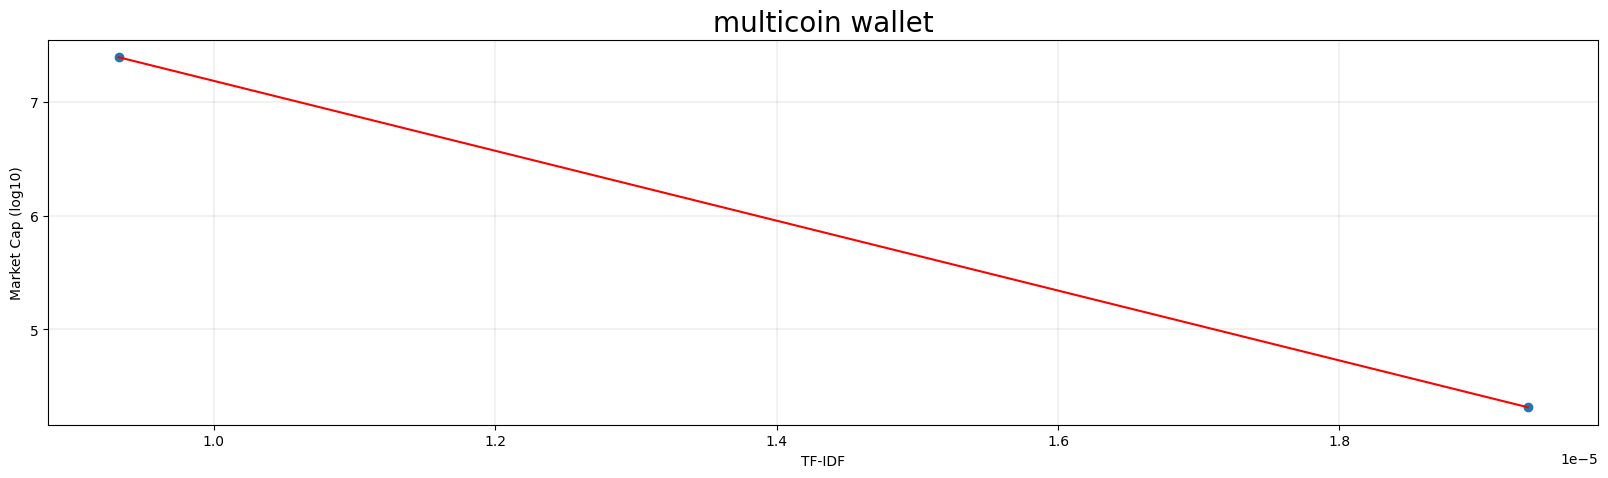

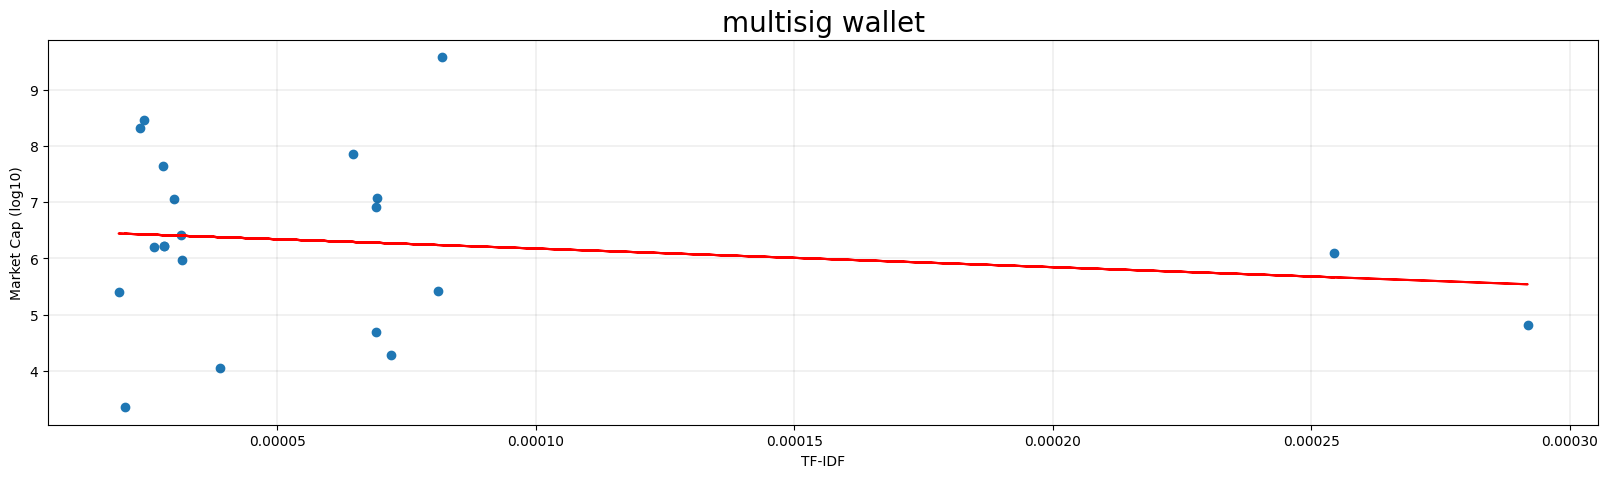

delegated proof stake is not good for visualization


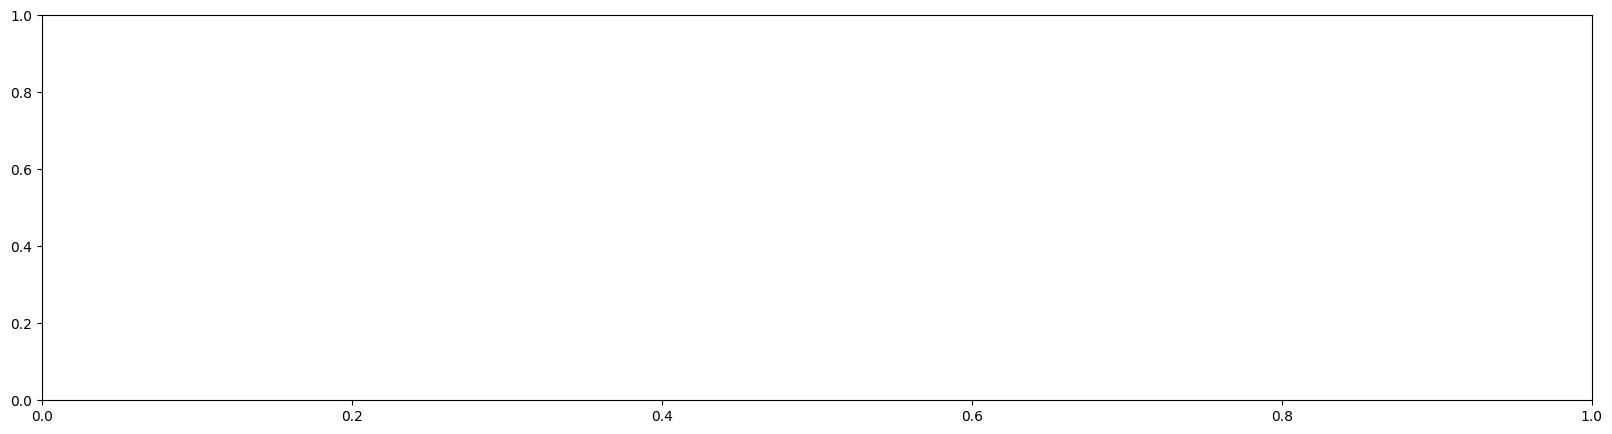

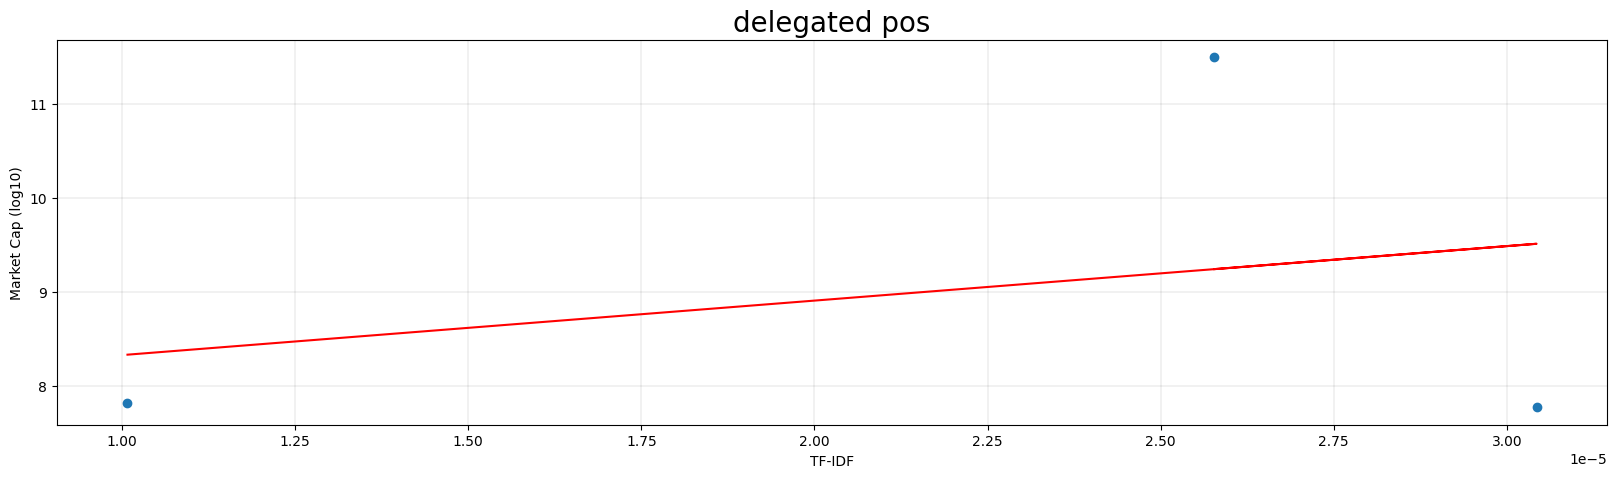

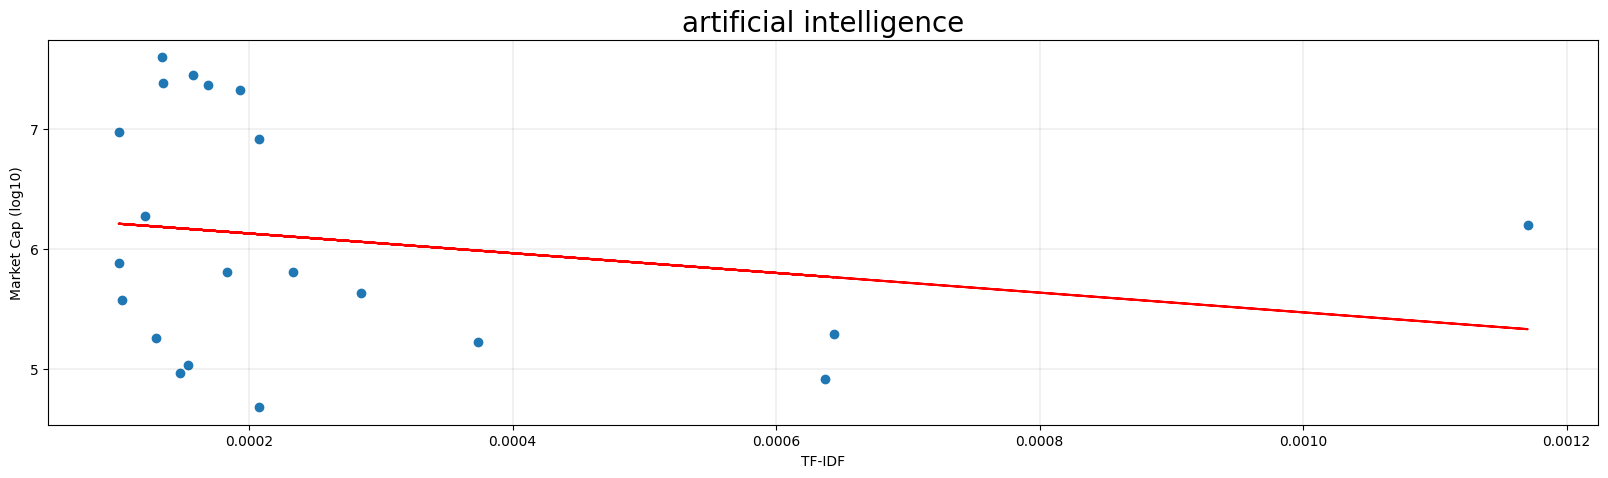

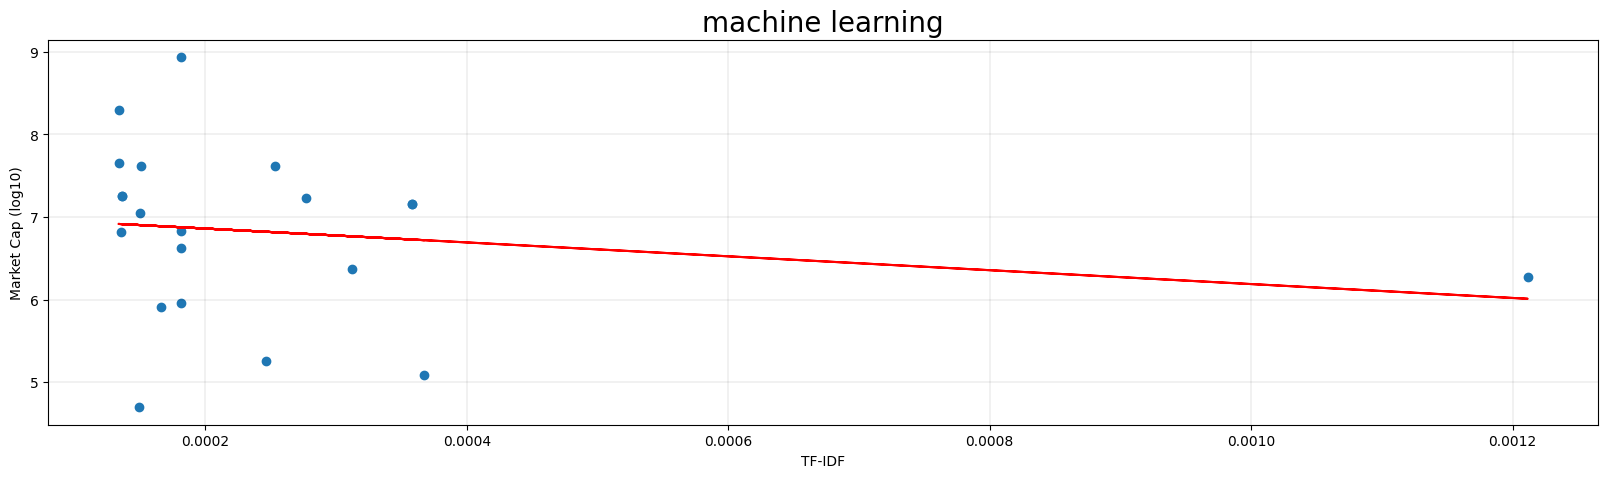

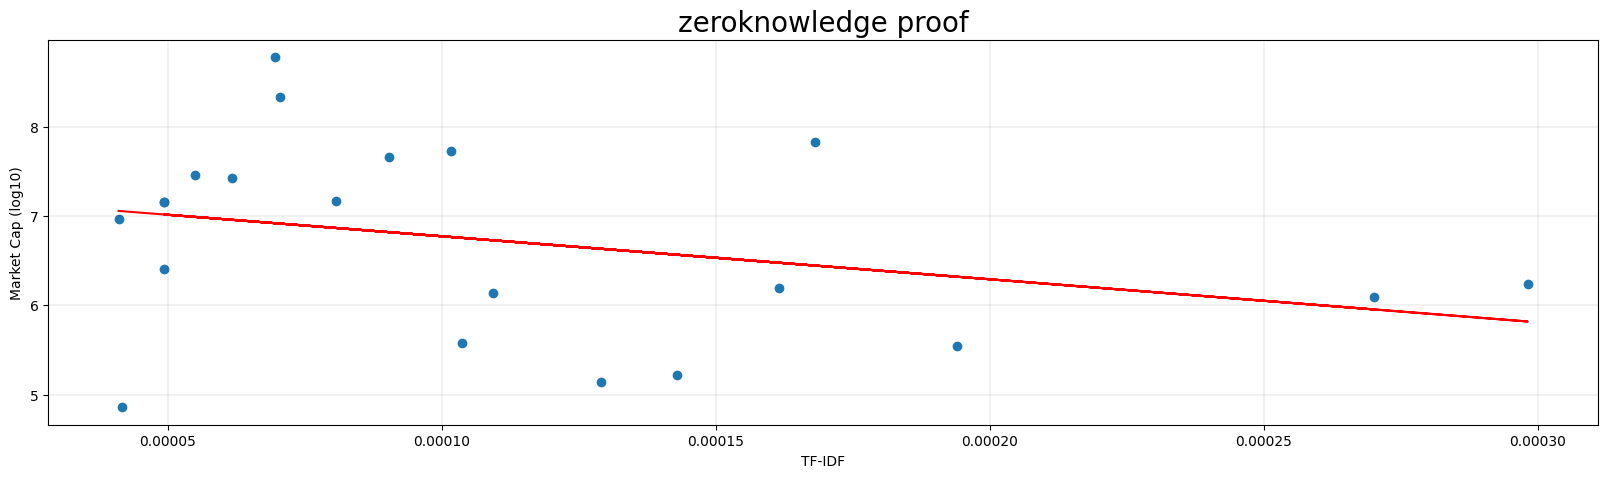

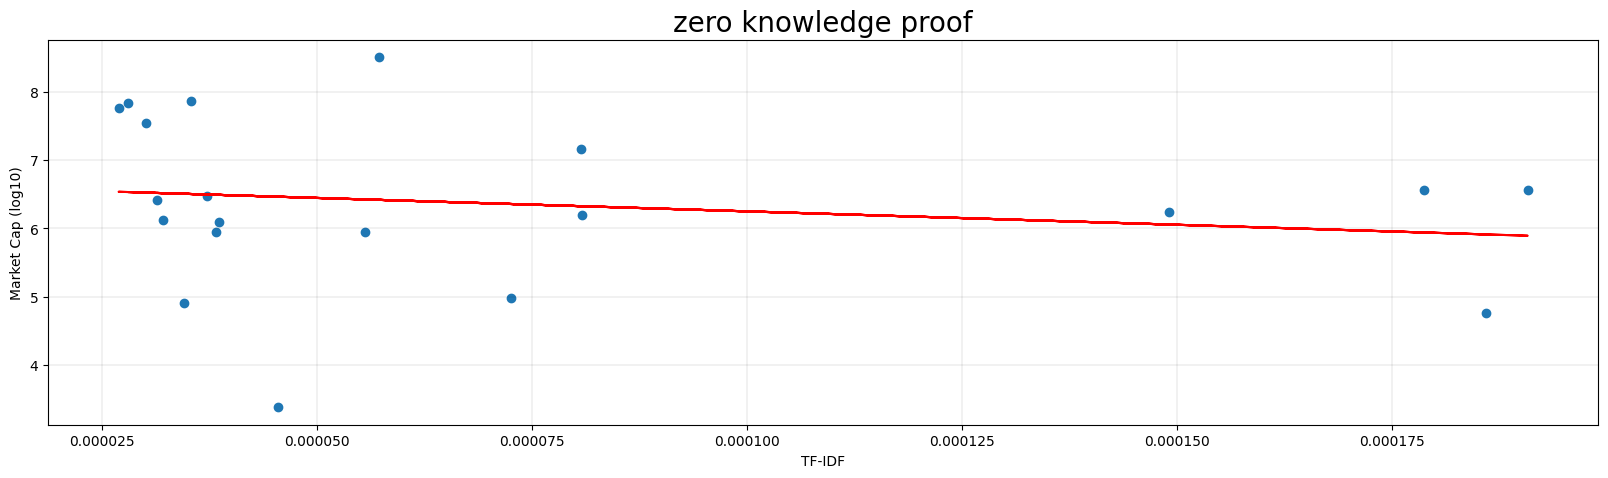

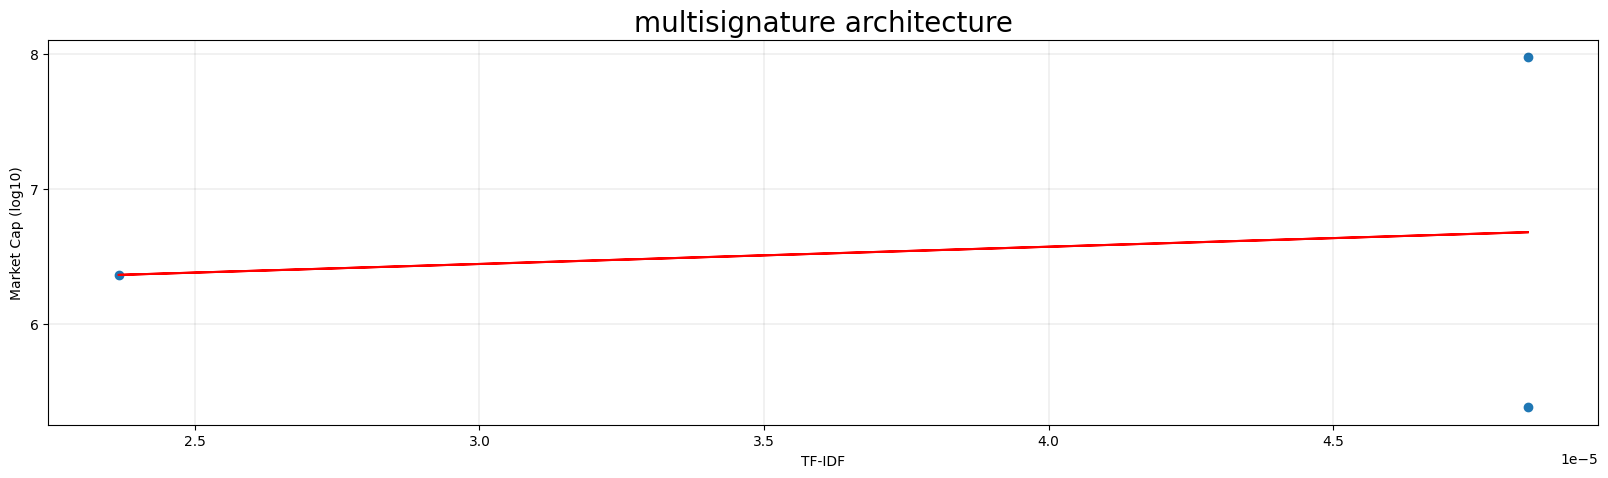

multi signature architecture is not good for visualization


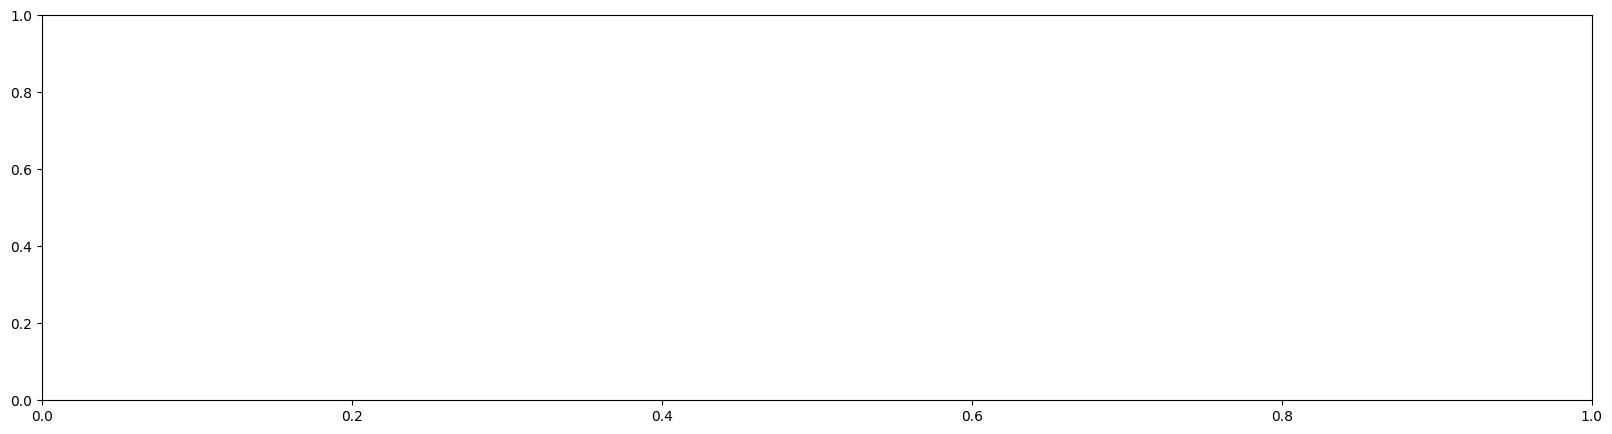

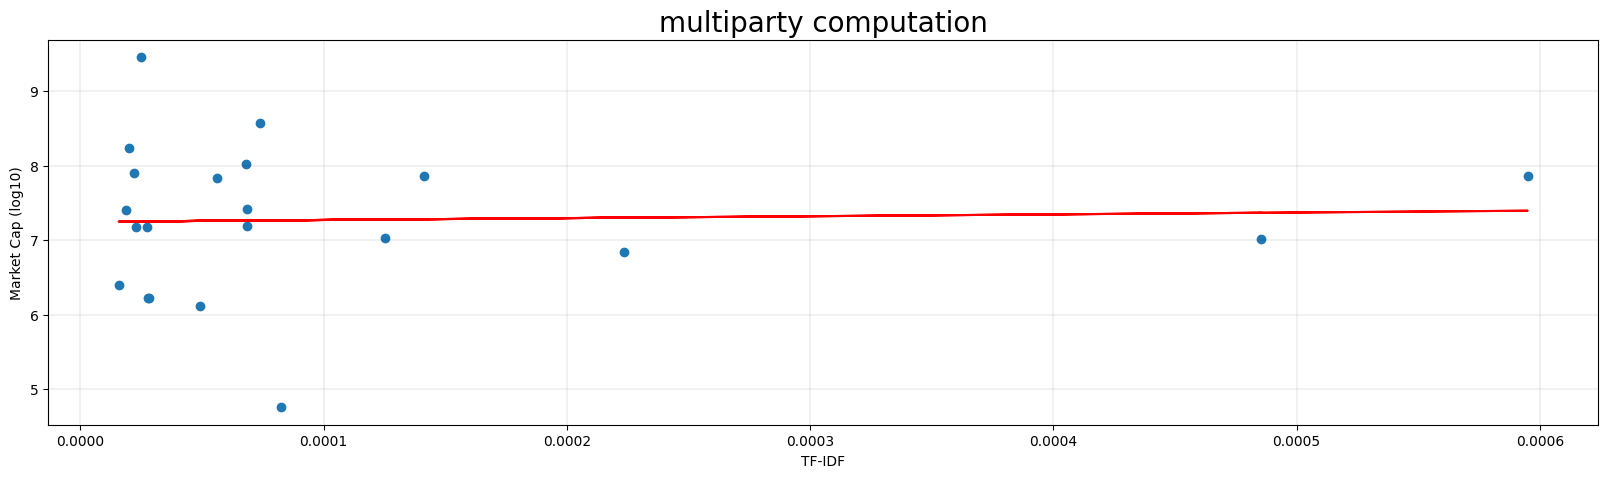

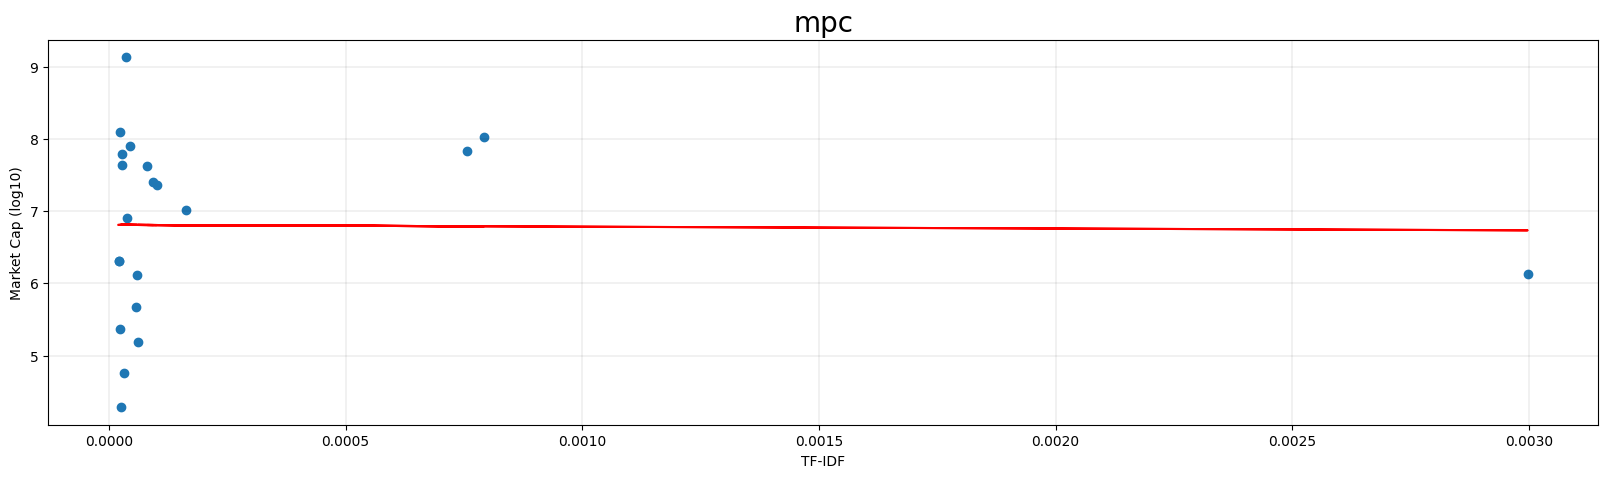

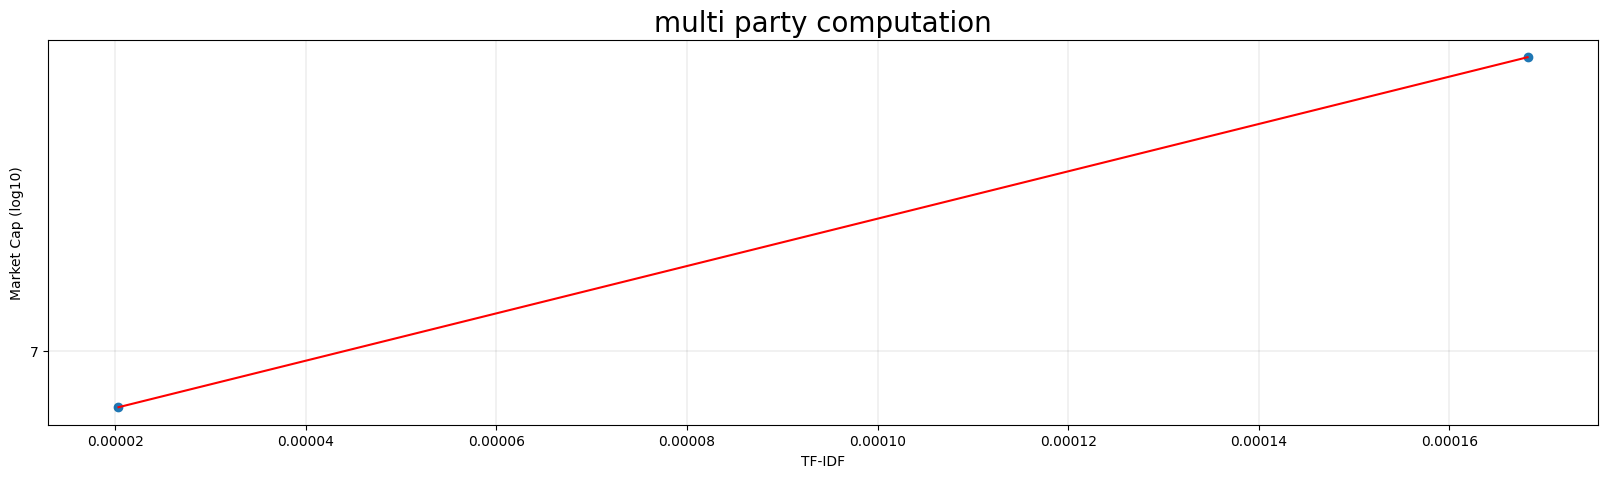

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


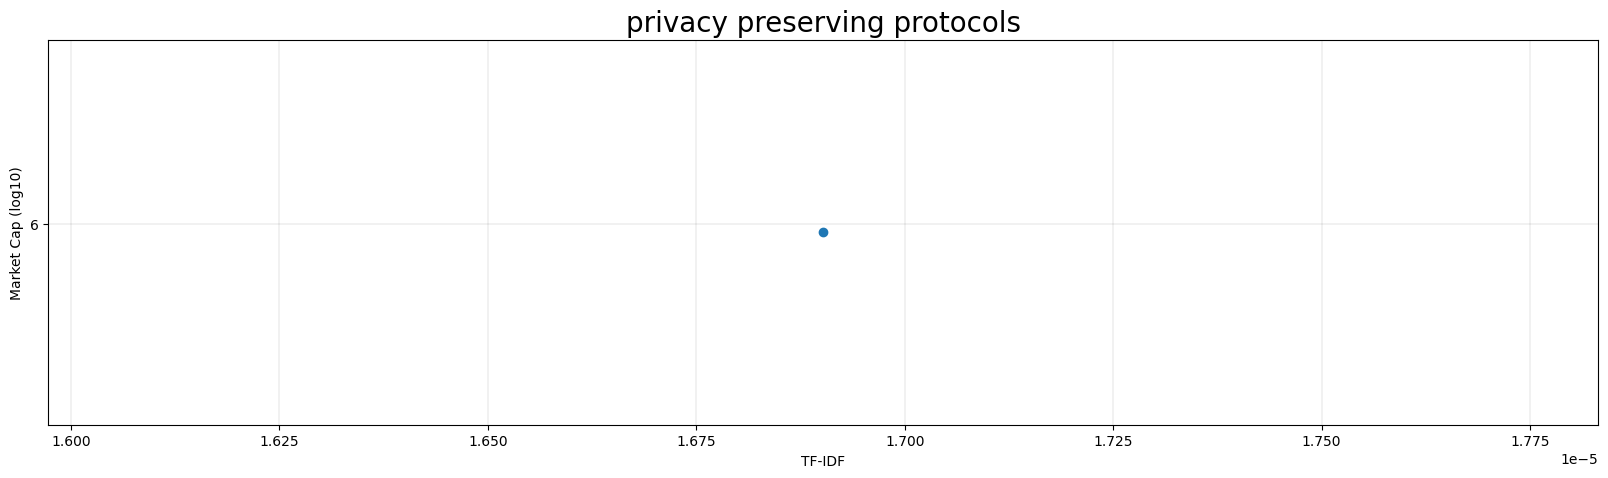

privacypreserving protocols is not good for visualization


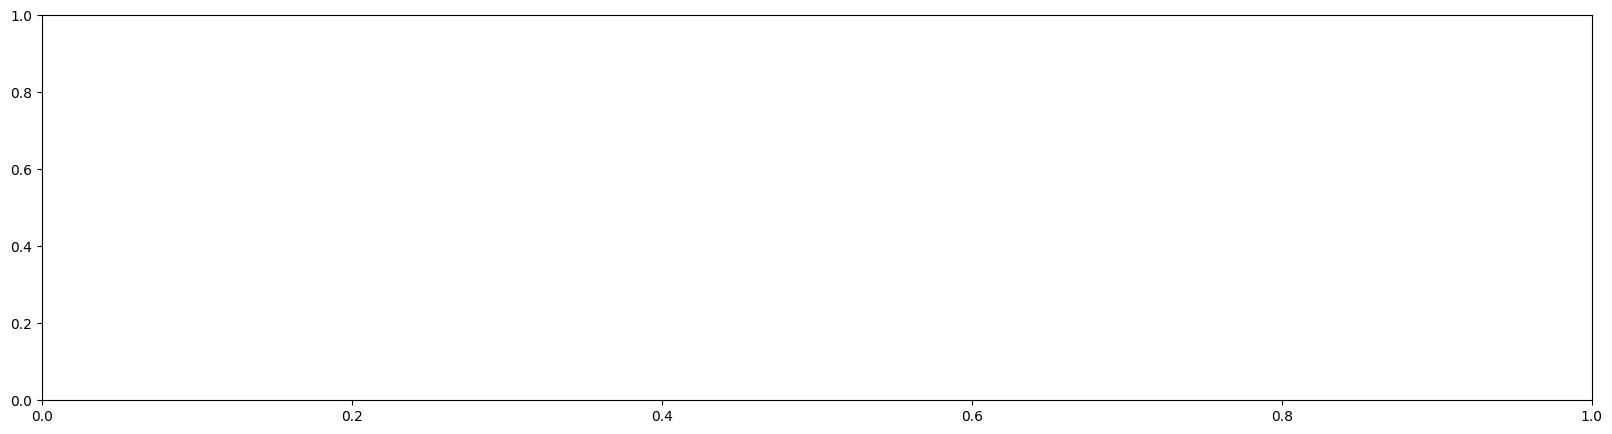

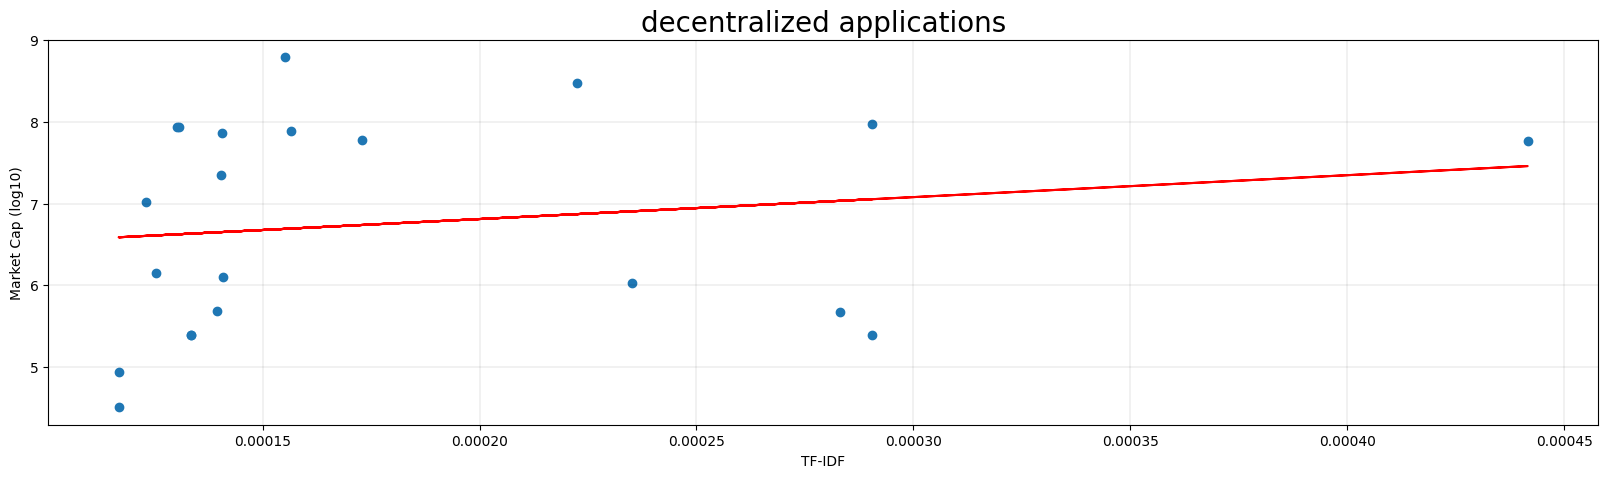

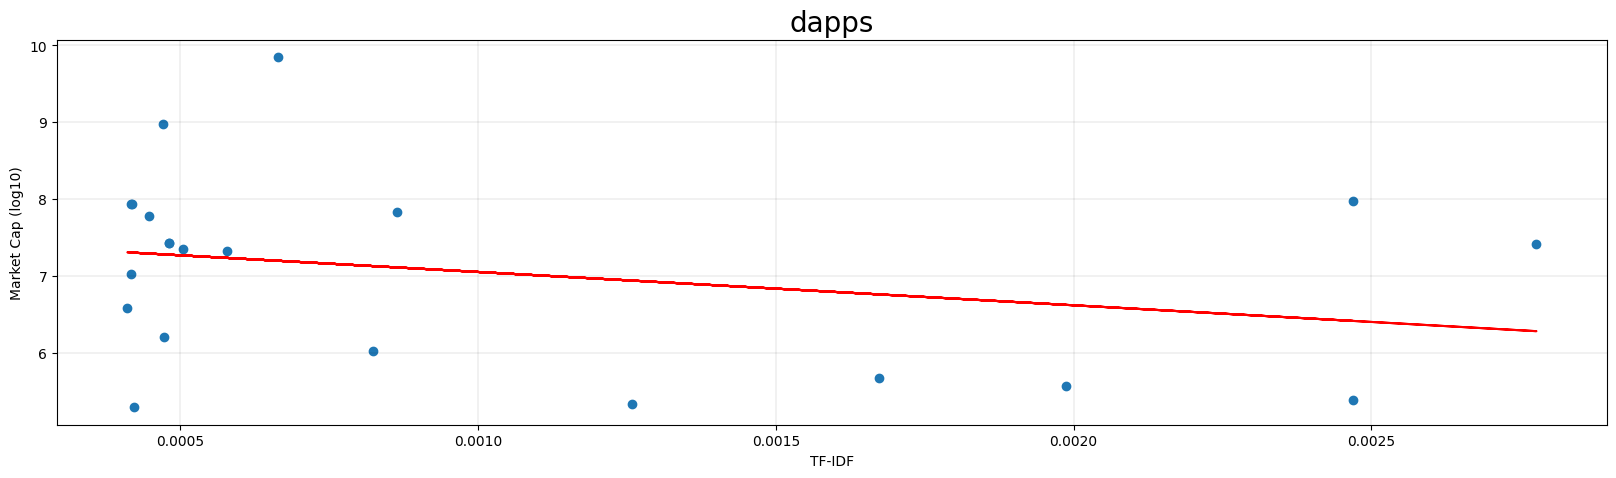

In [40]:
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]
    fig = plt.figure(figsize=(20,5))
    fig.add_subplot(111)

    try:
        x = top_df[i]
        y=np.log10(top_df.market_cap)
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        plt.scatter(x, y)

        plt.title(f'{i}', fontsize = 20)
        plt.xlabel('TF-IDF')
        plt.ylabel('Market Cap (log10)')

        plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
        plt.grid(color='black', linestyle='-', linewidth=0.08)
        plt.plot(x,p(x),"r-")

        # plt.xticks([0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008])
        # plt.hlines(y = 5, xmin = 0, xmax = 13, colors= 'black')
        # plt.vlines(x = 5, ymin = 0, ymax = 13, colors= 'black')
        plt.show()
    except Exception:
        print(f'{i} is not good for visualization')